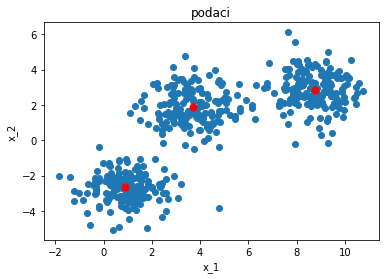

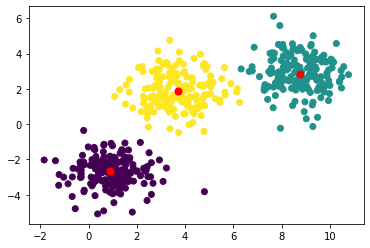

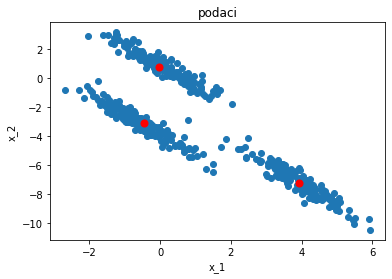

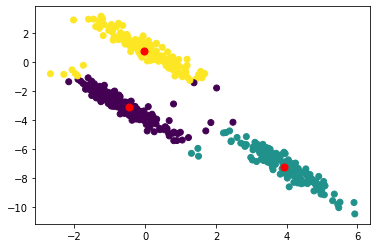

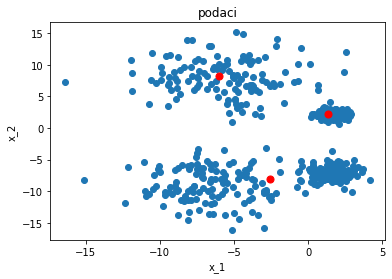

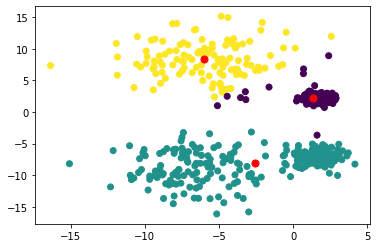

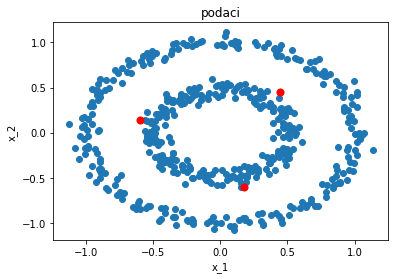

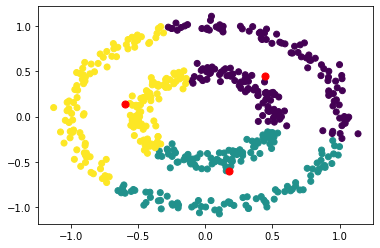

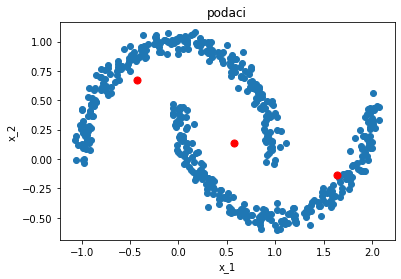

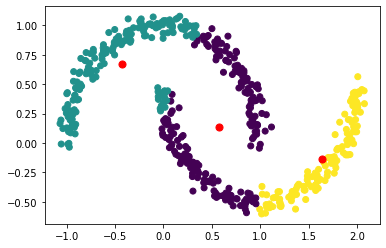

In [1]:
import scipy as sp
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math

def generate_data(n_samples, flagc):
    
    if flagc == 1:
        random_state = 365
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)


    elif flagc == 2:
        random_state = 148
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)
        
    elif flagc == 3:
        random_state = 148
        X, y = datasets.make_blobs(n_samples=n_samples, centers=4,
                          cluster_std=[1.0, 2.5, 0.5, 3.0],
                          random_state=random_state)

    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
        
    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
    
    else:
        X = []
        
    return X

for i in range(1,6):
    #if(i == 3): i = i+1
    X = generate_data(500, i)
    #print(X )
    #prikaz rezultata 
    plt.figure()
    plt.title('podaci')
    plt.scatter(X [:,0], X [:,1])
    plt.xlabel('x_1')
    plt.ylabel('x_2')

    kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init=10, random_state = 0)
    pred_y = kmeans.fit_predict(X)
    #print(kmeans)
    #print(pred_y)
    #dodavanje crvenih točkica
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c = 'red')
    plt.show()

    #prikaz s istim bojama
    plt.figure()
    plt.scatter(X [:,0], X [:,1], c = pred_y)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c = 'red')
    plt.show()

KMeans(n_clusters=3, random_state=0)


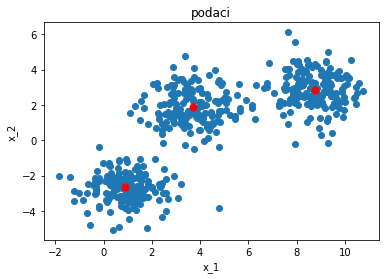

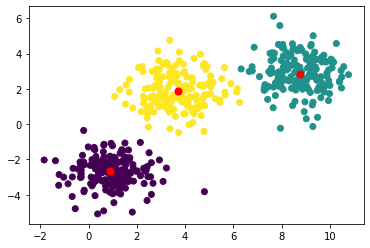

[9021.55121404746, 3023.1718722894966, 905.2272094176424, 787.5131839996013, 688.6916515940835, 596.1212048311265, 510.2192838781656, 444.3397329980896, 394.0881060342314, 355.6296386181299, 318.6248683044307, 291.2170658771257, 272.8082092942983, 258.2179007871018, 246.13519887508426, 236.11040827203692, 218.9888398594915, 213.06259593709007, 199.76819732059656]


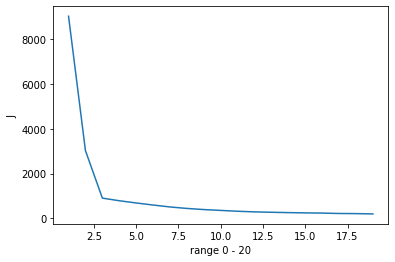

In [2]:
import scipy as sp
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math


def generate_data(n_samples, flagc):
    if flagc == 1:
        random_state = 365
        X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

    elif flagc == 2:
        random_state = 148
        X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)

    elif flagc == 3:
        random_state = 148
        X, y = datasets.make_blobs(n_samples=n_samples,
                                   cluster_std=[1.0, 2.5, 0.5, 3.0],
                                   random_state=random_state)

    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)

    else:
        X = []

    return X


X = generate_data(500, 1)

plt.figure()
plt.title('podaci')
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('x_1')
plt.ylabel('x_2')
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
print(kmeans)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()


kriterijska = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, tol=1e-04, random_state=0)
    pred_y = kmeans.fit_predict(X)
    kriterijska.append(kmeans.inertia_)



plt.plot(range(1, 20), kriterijska)
plt.xlabel('range 0 - 20')
plt.ylabel(' J ')
print(kriterijska)


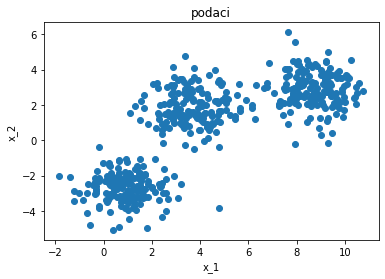

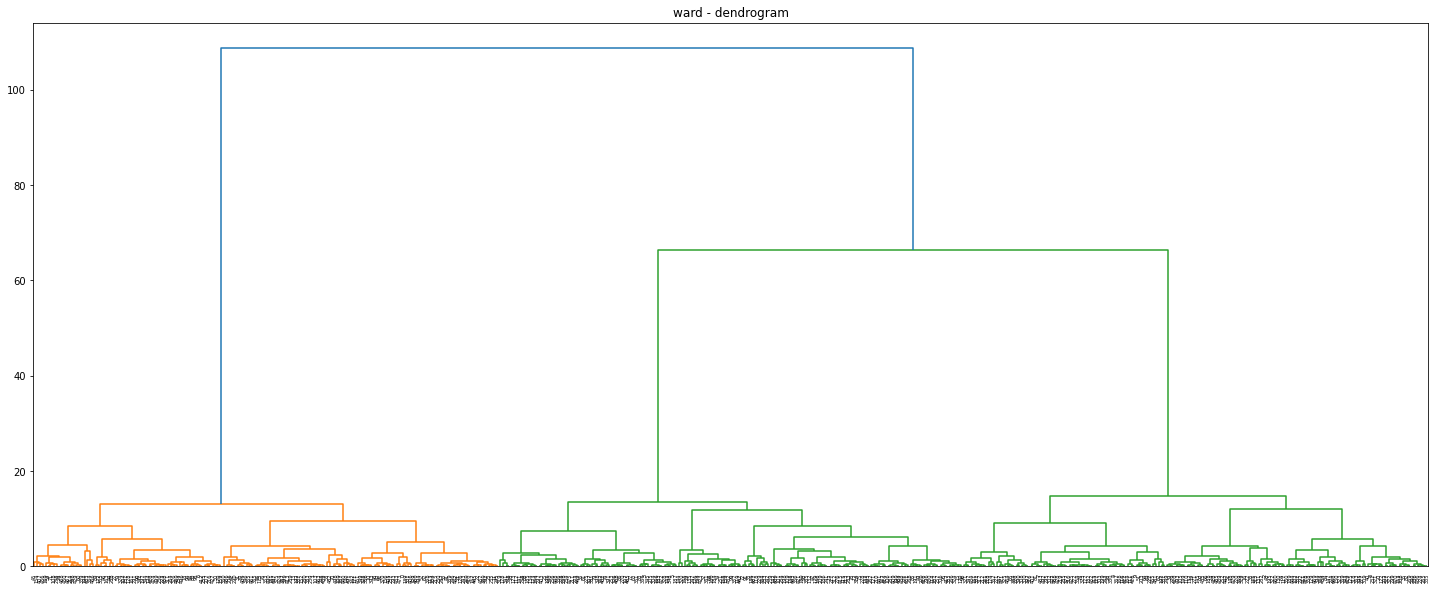

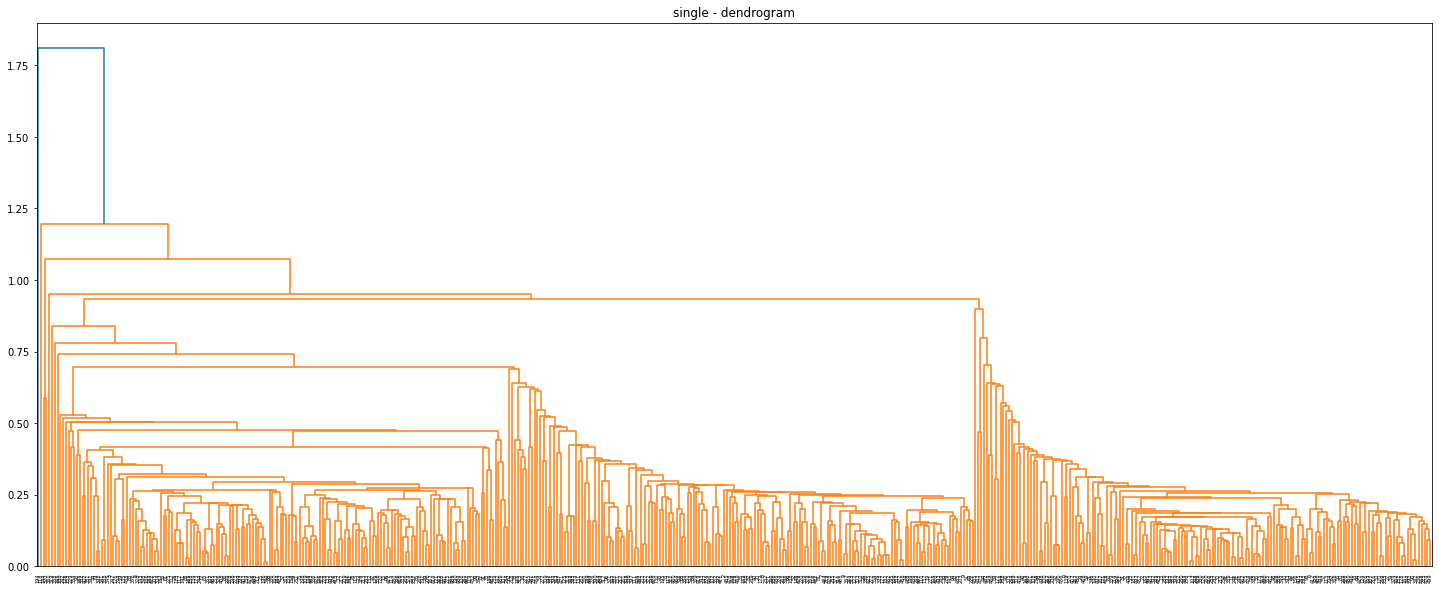

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy as sp
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math


def generate_data(n_samples, flagc):
    if flagc == 1:
        random_state = 365
        X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

    elif flagc == 2:
        random_state = 148
        X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)

    elif flagc == 3:
        random_state = 148
        X, y = datasets.make_blobs(n_samples=n_samples,
                                   cluster_std=[1.0, 2.5, 0.5, 3.0],
                                   random_state=random_state)

    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)

    else:
        X = []

    return X


X = generate_data(500, 1)

plt.figure()
plt.title('podaci')
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('x_1')
plt.ylabel('x_2')

plt.figure(figsize=(25, 10))
plt.title('ward - dendrogram')
Z = linkage(X, 'ward')
dn = dendrogram(Z)

plt.figure(figsize=(25, 10))
plt.title('single - dendrogram')
Z = linkage(X, 'single')
dn = dendrogram(Z)


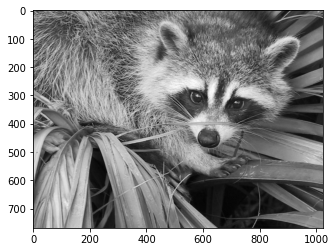

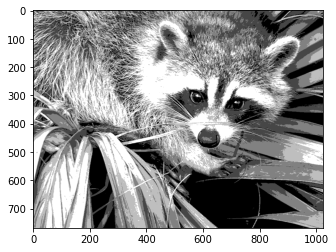

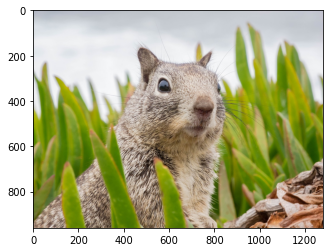

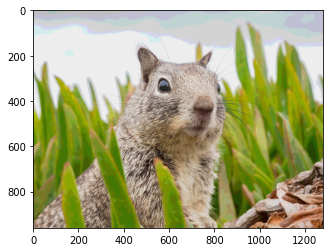

In [9]:
import scipy as sp
from sklearn import cluster, datasets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

try:
    face = sp.face(gray=True)
except AttributeError:
    from scipy import misc

    face = misc.face(gray=True)

X = face.reshape((-1, 1))
k_means = cluster.KMeans(n_clusters=5, n_init=1)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

plt.figure(1)
plt.imshow(face, cmap='gray')

plt.figure(2)
plt.imshow(face_compressed, cmap='gray')

imageNew = mpimg.imread('example.png')

X = imageNew.reshape((-1, 1))
k_means = cluster.KMeans(n_clusters=10, n_init=1)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
imageNew_compressed = np.choose(labels, values)
imageNew_compressed.shape = imageNew.shape

plt.figure(3)
plt.imshow(imageNew, cmap='gray')

plt.figure(4)
plt.imshow(imageNew_compressed, cmap='gray')

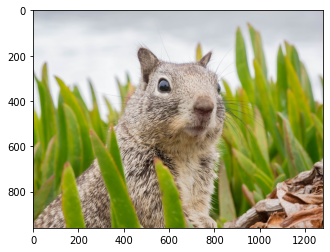

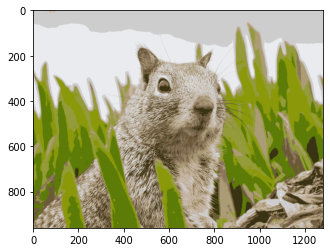

In [10]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

colors = 10
imgOriginal = io.imread('example.png')

imgArray = np.reshape(imgOriginal, (-1, 3))
imgArray = imgArray / 255

imgArrayTrain = shuffle(imgArray, random_state=0)[:10000]
kmeans = KMeans(n_clusters=colors, random_state=0).fit(imgArrayTrain)

labels = kmeans.predict(imgArray)
centers = kmeans.cluster_centers_
img = np.reshape(centers[labels], imgOriginal.shape)

plt.figure(1)
plt.imshow(imgOriginal)

plt.figure(2)
plt.imshow(img)

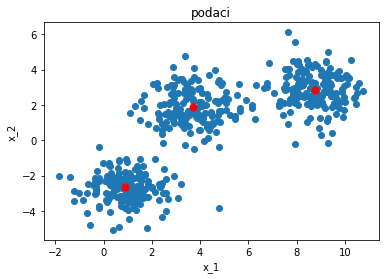

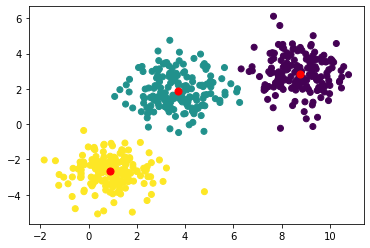

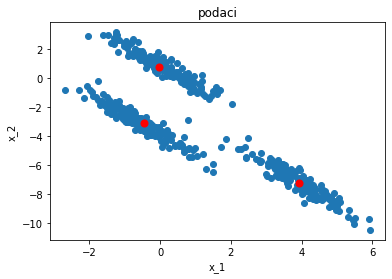

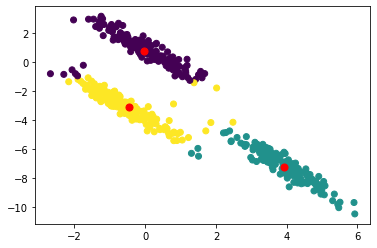

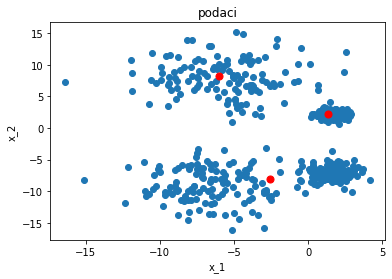

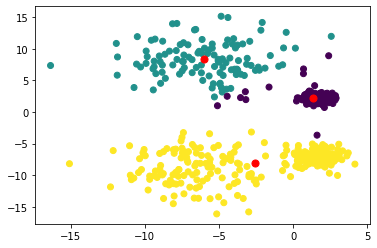

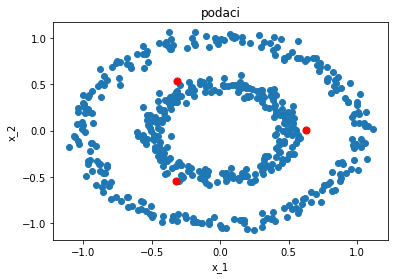

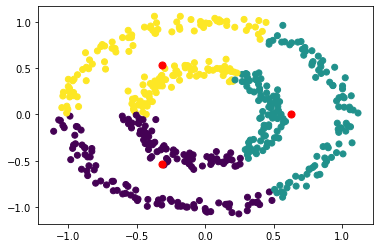

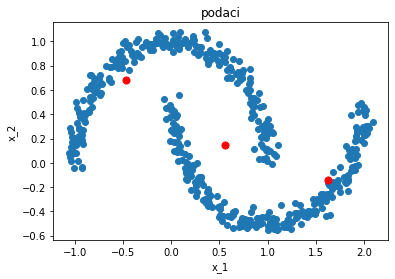

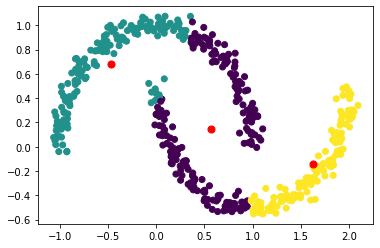

In [15]:
def generate_data(n_samples, flagc):
    
    if flagc == 1:
        random_state = 365
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)


    elif flagc == 2:
        random_state = 148
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)
        
    elif flagc == 3:
        random_state = 148
        X, y = datasets.make_blobs(n_samples=n_samples, centers=4,
                          cluster_std=[1.0, 2.5, 0.5, 3.0],
                          random_state=random_state)

    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
        
    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
    
    else:
        X = []
        
    return X

def kmeans(X, K, max_iter=10, tolerance=1.0):
    """
    Apply the k-means algorithm to the data in the X array.
    
    Parameters
    ----------
    X : ndarray, shape (num_samples, num_features)
        The input data.
    K : int
        The number of clusters to form as well as the number of centroids to generate.
    max_iter : int, optional
        The maximum number of iterations.
    tolerance : float, optional
        The tolerance for the k-means algorithm.
        
    Returns
    -------
    labels : ndarray, shape (num_samples,)
        The cluster labels for each point.
    centroids : ndarray, shape (K, num_features)
        The K centroids.
    """
    # Initialize the centroids randomly
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]

    # Initialize the labels to zero
    labels = np.zeros(X.shape[0])

    # Run the k-means algorithm
    for _ in range(max_iter):
        # Calculate the distances between each point and the centroids
        distances = np.sqrt(np.sum((X[:,np.newaxis,:] - centroids)**2, axis=2))

        # Find the nearest centroid for each point
        new_labels = np.argmin(distances, axis=1)

        # Check if the labels have changed
        if np.all(new_labels == labels):
            # If the labels have not changed, stop the algorithm
            break

        # Update the labels
        labels = new_labels

        # Calculate the new centroids
        for k in range(K):
            centroids[k] = np.mean(X[labels == k], axis=0)
    
    return labels, centroids


for i in range(1,6):
    #if(i == 3): i = i+1
    X = generate_data(500, i)
    #print(X )
    #prikaz rezultata 
    plt.figure()
    plt.title('podaci')
    plt.scatter(X [:,0], X [:,1])
    plt.xlabel('x_1')
    plt.ylabel('x_2')

    labels, centroids = kmeans(X, 3, max_iter = 300)

    plt.scatter(centroids[:,0], centroids[:,1], s=50, c = 'red')
    plt.show()

    #prikaz s istim bojama
    plt.figure()
    plt.scatter(X [:,0], X [:,1], c = labels)
    plt.scatter(centroids[:,0], centroids[:,1], s=50, c = 'red')
    plt.show()